#### Step-by-Step Data Preprocessing

In [7]:
# 1. Import libraries
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# from imblearn.over_sampling import SMOTE

# Download necessary NLTK data
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# 2. Load Data
def preprocess_data_from_file(filepath):
    with open(filepath, "r") as file:
        data = file.read()
    lines = data.strip().split("\n")
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(" ", 1)
        label = int(label.split("__label__")[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({"label": labels, "text": texts})


train_filepath = "train.3270.txt"
df_train = preprocess_data_from_file(train_filepath)

In [9]:
# 3. Preprocessing Functions

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [10]:
# 3.1 Test with first_text in df_train
# Get text
first_text = df_train["text"][0]
first_text = first_text.lower()
print(first_text)
first_text = re.sub(r"[\W_]+", " ", first_text)
print(first_text)

stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^
stuning even for the non gamer this sound track was beautiful it paints the senery in your mind so well i would recomend it even to people who hate vid game music i have played the game chrono cross but out of all of the games i have ever played it has the best music it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras it would impress anyone who cares to listen 


In [11]:
# Tokenize
first_text_tokens = word_tokenize(first_text)
first_text_tokens.__len__()

80

In [6]:
# Remove stop words
first_text_no_stopwords = [word for word in first_text_tokens if word not in stop_words]
first_text_no_stopwords.__len__()

44

In [7]:
# Stemming
first_text_stemming = [stemmer.stem(word) for word in first_text_no_stopwords]

In [8]:
# Lemmatization
first_text_lemmatization = [
    lemmatizer.lemmatize(word) for word in first_text_no_stopwords
]

In [9]:
# Join all words return to text
first_text_process = " ".join(first_text_lemmatization)
print(first_text_process)

stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen


In [10]:
def preprocess_text(text, method="lemmatize"):
    # Lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r"[\W_]+", " ", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    if method == "stem":
        tokens = [stemmer.stem(word) for word in tokens]
    elif method == "lemmatize":
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


# Apply text preprocessing
df_train["text"] = df_train["text"].apply(
    lambda x: preprocess_text(x, method="lemmatize")
)

In [11]:
# 4. Handling Imbalanced Data

# Before handling imbalanced data, let's check the distribution of labels.
print(df_train["label"].value_counts())

label
1    1770
2    1500
Name: count, dtype: int64


In [12]:
# Split data into features and labels
X = df_train["text"]
y = df_train["label"]

In [13]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

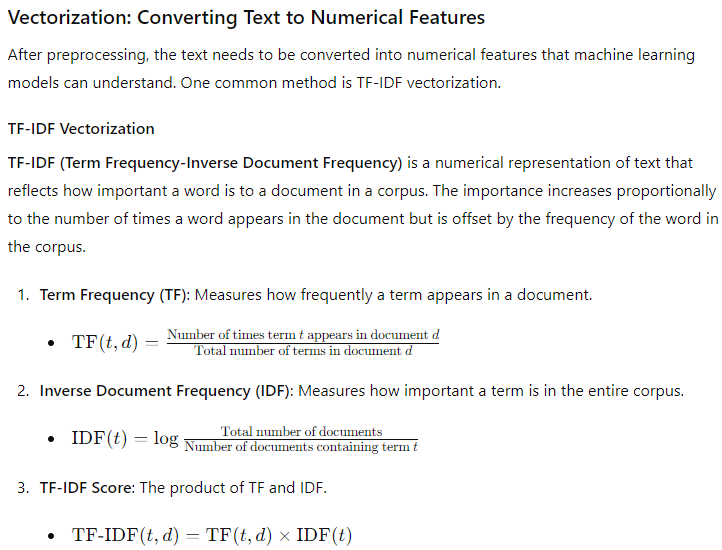


In [14]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

#### Example

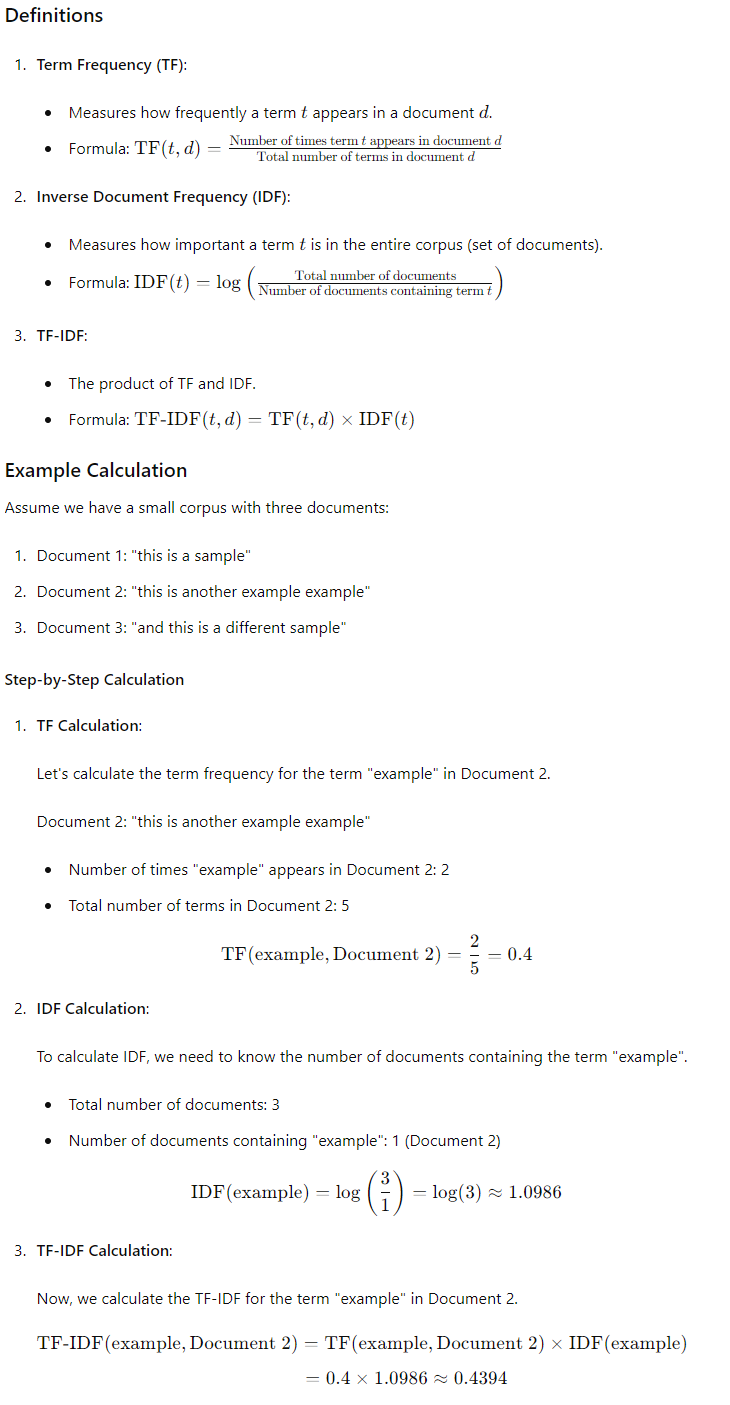

In [15]:
import numpy as np

# Example documents
documents = [
    "this is a sample",
    "this is another example example",
    "and this is a different sample",
]

# Split documents into words
tokenized_documents = [doc.split() for doc in documents]


# Calculate TF for a term in a specific document
def compute_tf(term, document):
    term_count = document.count(term)
    total_terms = len(document)
    return term_count / total_terms


# Calculate IDF for a term across all documents
def compute_idf(term, all_documents):
    num_documents_with_term = sum(1 for doc in all_documents if term in doc)
    total_documents = len(all_documents)
    return np.log(total_documents / num_documents_with_term)


# Calculate TF-IDF for a term in a specific document
def compute_tf_idf(term, document, all_documents):
    tf = compute_tf(term, document)
    idf = compute_idf(term, all_documents)
    return tf * idf


# Example calculation
term = "example"
document_index = 1  # Document 2
document = tokenized_documents[document_index]

tf = compute_tf(term, document)
idf = compute_idf(term, tokenized_documents)
tf_idf = compute_tf_idf(term, document, tokenized_documents)

print(f"TF({term}, Document {document_index + 1}) = {tf}")
print(f"IDF({term}) = {idf}")
print(f"TF-IDF({term}, Document {document_index + 1}) = {tf_idf}")

TF(example, Document 2) = 0.4
IDF(example) = 1.0986122886681098
TF-IDF(example, Document 2) = 0.43944491546724396


In [16]:
# If the data is imbalanced, we can use SMOTE to oversample the minority class.

# Handle imbalanced data using SMOTE
# smote = SMOTE(random_state=42)
# X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [17]:
# 5. Model Training and Evaluation

# Model selection and training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
# Model evaluation on validation set
y_val_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8042813455657493
Validation Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.86      0.82       342
           2       0.83      0.74      0.78       312

    accuracy                           0.80       654
   macro avg       0.81      0.80      0.80       654
weighted avg       0.81      0.80      0.80       654

